In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo 
from sklearn.decomposition import PCA,FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [89]:
#import Dataset
wine = pd.read_csv(r'C:\Users\Stevi\OneDrive\Documents\Projects\Stats-Lab\Data\winequality-red.csv',delimiter=';')

In [90]:
#Stats
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [91]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [92]:
# Check for missing values
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

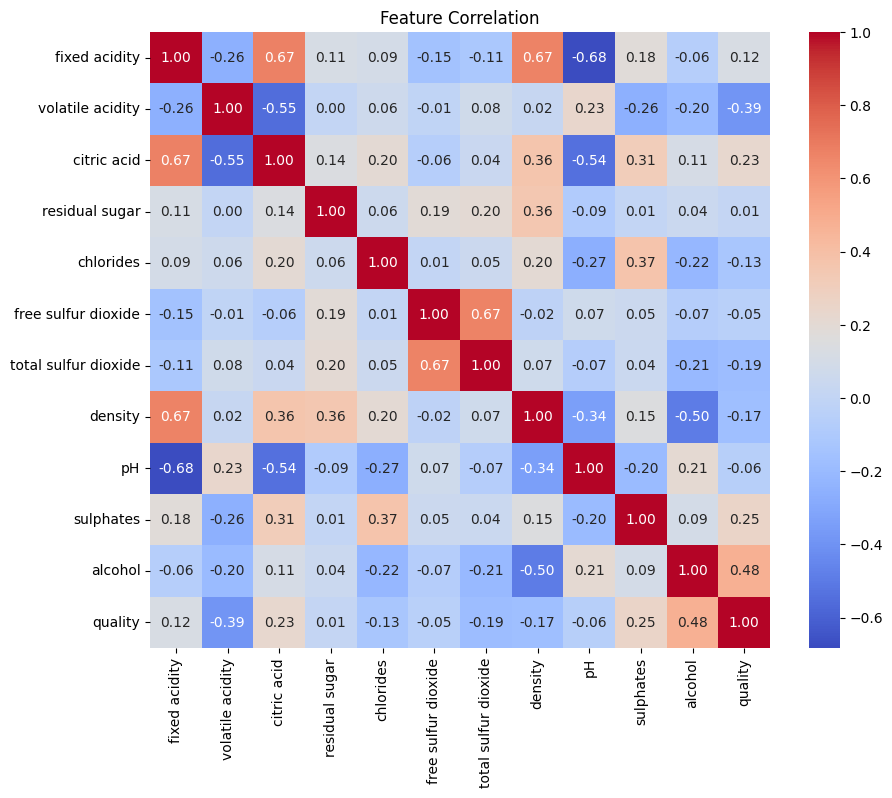

In [93]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

In [94]:
# Spliting data into features and target variable
X = wine.drop('quality', axis=1)
y = wine['quality']

In [95]:
# Scaling Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [96]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [97]:
# PCA
pca = PCA().fit(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))


Explained variance ratio: [9.46576976e-01 4.83683046e-02 2.58917183e-03 1.51896798e-03
 8.73553990e-04 3.45607218e-05 1.93627614e-05 9.47278079e-06
 8.41376628e-06 1.21472798e-06 4.68762788e-10]
Total variance explained: 1.0


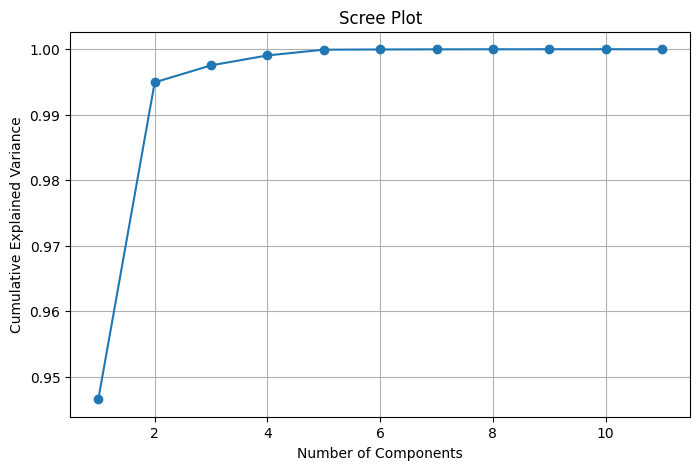

In [98]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()


In [99]:
# Create column names for all principal components
pc_names = [f'PC{i+1}' for i in range(pca.n_components_)]
loadings = pd.DataFrame(pca.components_.T,columns=pc_names,index=X.columns)
display(loadings)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed acidity,-0.006132,-0.023899,0.953136,-0.265092,0.098148,0.079312,0.011142,0.064907,-0.016206,0.011189,-0.000942
volatile acidity,0.000384,-0.002010,-0.025132,0.007274,-0.041157,0.689242,0.464366,-0.338841,0.428632,-0.091587,-0.000719
citric acid,0.000171,-0.003035,0.073708,-0.009832,0.041482,-0.504044,-0.205508,-0.327123,0.760466,-0.105489,-0.000058
residual sugar,0.008649,0.011135,0.280914,0.943178,-0.176627,-0.005766,0.002495,0.004134,-0.006931,-0.001486,-0.000413
chlorides,0.000064,-0.000237,0.002946,-0.000645,-0.009480,-0.057016,0.113948,-0.132518,0.072197,0.980249,-0.001819
free sulfur dioxide,0.218857,0.975266,0.020897,-0.021189,-0.007868,0.001060,-0.000093,-0.002574,0.001499,-0.000318,0.000009
total sulfur dioxide,0.975678,-0.218917,-0.001527,-0.003980,0.010323,0.000614,-0.000230,0.001212,-0.000657,0.000260,-0.000003
density,0.000004,-0.000025,0.000776,0.000055,-0.000834,0.000467,0.001600,0.004108,0.002839,0.002033,0.999983
pH,-0.000268,0.003272,-0.058631,0.020578,0.012622,0.142002,-0.010261,0.859197,0.478788,0.090645,-0.005068
sulphates,0.000223,0.000619,0.017525,-0.007199,0.023585,-0.488427,0.853721,0.132919,-0.053568,-0.105567,-0.001311


In [100]:
# Factor Analysis
# Compute eigenvalues
cov_matrix = np.cov(X_scaled.T)
eigenvalues, _ = np.linalg.eig(cov_matrix)


In [101]:
fa = FactorAnalysis(n_components=3, random_state=42)
X_fa = fa.fit_transform(X_scaled)

print("Shape after Factor Analysis:", X_fa.shape)


Shape after Factor Analysis: (1599, 3)


In [102]:
# Create a DataFrame for factor loadings
loadings = pd.DataFrame(fa.components_.T,columns=['Factor1','Factor2','Factor3'],index=X.columns)

display(loadings)


,Factor1,Factor2,Factor3
fixed acidity,0.687592,-0.204660,0.515873
volatile acidity,0.003683,0.099919,-0.600302
citric acid,0.393543,-0.040817,0.798437
residual sugar,0.353529,0.186373,-0.016578
chlorides,0.205903,0.034718,0.098411
free sulfur dioxide,-0.017662,0.693547,-0.008426
total sulfur dioxide,0.081151,0.963887,0.052298
density,0.994293,-0.007791,-0.034437
pH,-0.368566,0.000253,-0.550937
sulphates,0.157323,0.020901,0.296810


In [103]:
# Discriminant Analysis
lda = LDA(n_components=2)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

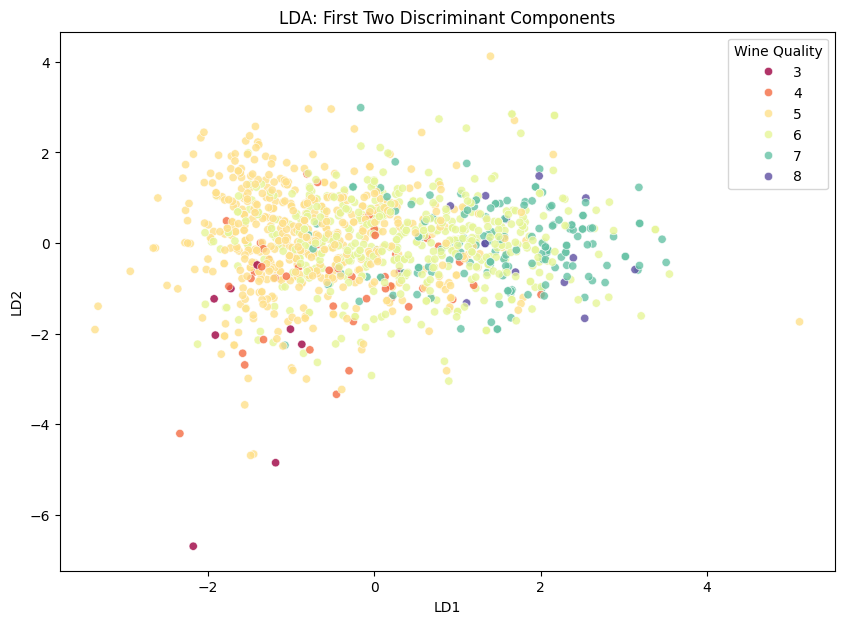

In [104]:
lda_df = pd.DataFrame(X_train_lda, columns=['LD1','LD2'])
lda_df['quality'] = y_train.values

plt.figure(figsize=(10,7))
sns.scatterplot(data=lda_df, x='LD1', y='LD2',hue='quality', palette='Spectral', alpha=0.8)
plt.title('LDA: First Two Discriminant Components')
plt.legend(title='Wine Quality')
plt.show()


Accuracy: 0.559375


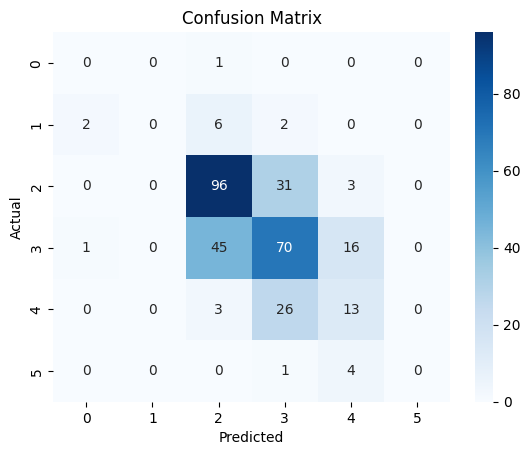

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.64      0.74      0.68       130
           6       0.54      0.53      0.53       132
           7       0.36      0.31      0.33        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.26      0.26      0.26       320
weighted avg       0.53      0.56      0.54       320



c:\Users\Stevi\OneDrive\Documents\Projects\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Stevi\OneDrive\Documents\Projects\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Stevi\OneDrive\Documents\Projects\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

In [105]:
y_pred = lda.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Detailed metrics
print(classification_report(y_test, y_pred))


In [106]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.575
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320



c:\Users\Stevi\OneDrive\Documents\Projects\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Stevi\OneDrive\Documents\Projects\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Stevi\OneDrive\Documents\Projects\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

In [107]:
y_probs = lr.predict_proba(X_test)[:,1]

In [109]:
# Binarize y_test for ROC curve (e.g., quality >= 6 as positive class)
y_test_binary = (y_test >= 6).astype(int)
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)

In [110]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

ValueError: multi_class must be in ('ovo', 'ovr')

<Figure size 800x600 with 0 Axes>